#Stevens Institute of Technology
#Final Project 10
#CS 513 Knowledge Discovery and Data Mining

Prediction of loan default using Home Equity loans data from the united states.

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score,recall_score, classification_report, confusion_matrix, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [4]:
df = pd.read_csv('hmeq.csv')
df.head(10)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
6,1,1800,48649.0,57037.0,HomeImp,Other,5.0,3.0,2.0,77.100000,1.0,17.0,NaN
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
8,1,2000,32700.0,46740.0,HomeImp,Other,3.0,0.0,2.0,216.933333,1.0,12.0,NaN
9,1,2000,NaN,62250.0,HomeImp,Sales,16.0,0.0,0.0,115.800000,0.0,13.0,NaN


The variable we intend to predict is "BAD". So 1 means BAD (customer defaulted) and 0 implies GOOD (customer did not default and paid the loan)

##### ◾ BAD: 1 = applicant defaulted on loan or seriously delinquent; 0 = applicant paid loan
##### ◾ LOAN: Amount of the loan request
##### ◾ MORTDUE: Amount due on existing mortgage
##### ◾ VALUE: Value of current property
##### ◾ REASON: DebtCon = debt consolidation; HomeImp = home improvement
##### ◾ JOB: Occupational categories
##### ◾ YOJ: Years at present job
##### ◾ DEROG: Number of major derogatory reports
##### ◾ DELINQ: Number of delinquent credit lines
##### ◾ CLAGE: Age of oldest credit line in months
##### ◾ NINQ: Number of recent credit inquiries
##### ◾ CLNO: Number of credit lines
##### ◾ DEBTINC: Debt-to-income ratio

In [5]:
#checking the column names
df.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

In [6]:
#checking the number of columns
len(df.columns)

13

In [7]:
#checking the shape of dataset
df.shape

(5960, 13)

There are 13 rows and 5960 observations in the dataset.

In [8]:
#check if there are NA values in the dataset
df.isnull().values.any()

True

In [9]:
#checking missing values for each column
missing_values = df.isnull().sum()
print(missing_values)

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64


With the exception of the "BAD' and "LOANS" variables all of them have quiet a large number of missing values

In [10]:
#Given that this a loan credit data, we replace missing values with the most frequent value
df = df.fillna(df.mode().iloc[0])

In [11]:
#checking the dataset of imputation of the missing values
df.head(10)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,0.524499
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,0.524499
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,0.524499
3,1,1500,42000.0,60000.0,DebtCon,Other,0.0,0.0,0.0,102.500000,0.0,16.0,0.524499
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,0.524499
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
6,1,1800,48649.0,57037.0,HomeImp,Other,5.0,3.0,2.0,77.100000,1.0,17.0,0.524499
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
8,1,2000,32700.0,46740.0,HomeImp,Other,3.0,0.0,2.0,216.933333,1.0,12.0,0.524499
9,1,2000,42000.0,62250.0,HomeImp,Sales,16.0,0.0,0.0,115.800000,0.0,13.0,0.524499


In [12]:
#checking missing values for each column
missing_values = df.isnull().sum()
print(missing_values)

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5960 non-null   float64
 3   VALUE    5960 non-null   float64
 4   REASON   5960 non-null   object 
 5   JOB      5960 non-null   object 
 6   YOJ      5960 non-null   float64
 7   DEROG    5960 non-null   float64
 8   DELINQ   5960 non-null   float64
 9   CLAGE    5960 non-null   float64
 10  NINQ     5960 non-null   float64
 11  CLNO     5960 non-null   float64
 12  DEBTINC  5960 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


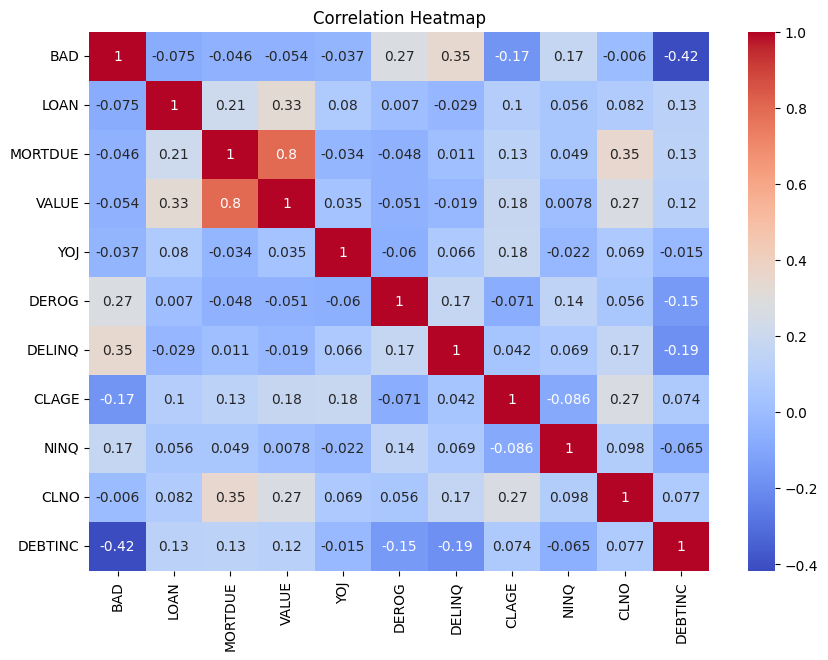

In [14]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='BAD', ylabel='count'>

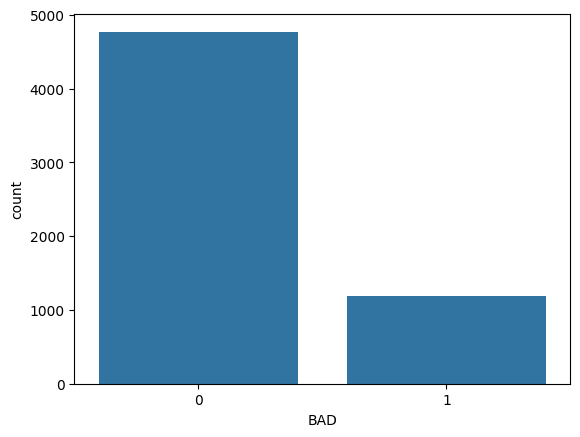

In [15]:
sns.countplot(x='BAD', data = df)

In [16]:
# REASON and JOB variables are being converted into dummies
REASON1 = pd.get_dummies(df['REASON'],drop_first=True)
JOB1 = pd.get_dummies(df['JOB'],drop_first=True)

In [17]:
# concatenating the new variables (REASON1 and JOB1) the dataset and dropping REASON and JOB
df.drop(['JOB','REASON'],axis=1,inplace=True)

In [18]:
df = pd.concat([df, REASON1, JOB1],axis=1)

In [19]:
df.head(5)

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,HomeImp,Office,Other,ProfExe,Sales,Self
0,1,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,0.524499,True,False,True,False,False,False
1,1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,0.524499,True,False,True,False,False,False
2,1,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,0.524499,True,False,True,False,False,False
3,1,1500,42000.0,60000.0,0.0,0.0,0.0,102.500000,0.0,16.0,0.524499,False,False,True,False,False,False
4,0,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,0.524499,True,True,False,False,False,False


The data appears to be slightly imbalanced. However, given that this a credit risk data, it may not be appropriate to use oversampling or undersampling in order not to lose valuable information from it.

In [20]:
y = df[["BAD"]]

In [21]:
X = df[['LOAN', 'MORTDUE','VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ',
          'CLNO', 'DEBTINC', 'HomeImp', 'Office', 'Other', 'ProfExe', 'Sales', 'Self']]

In [23]:
X['HomeImp'] = X['HomeImp'].astype(int)
X['Office'] = X['Office'].astype(int)
X['Other'] = X['Other'].astype(int)
X['ProfExe'] = X['ProfExe'].astype(int)
X['Sales'] = X['Sales'].astype(int)
X['Self'] = X['Self'].astype(int)

from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()

X = pd.DataFrame(scalar.fit_transform(X), columns = X.columns)

X.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,HomeImp,Office,Other,ProfExe,Sales,Self
0,0.000000,0.059869,0.036590,0.256098,0.0,0.000000,0.080777,0.058824,0.126761,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.002252,0.171050,0.071234,0.170732,0.0,0.133333,0.104289,0.000000,0.197183,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.004505,0.028773,0.010261,0.097561,0.0,0.000000,0.127942,0.058824,0.140845,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.004505,0.100474,0.061327,0.000000,0.0,0.000000,0.087739,0.000000,0.225352,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.006757,0.240856,0.122655,0.073171,0.0,0.000000,0.079893,0.000000,0.197183,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [24]:
# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [133]:
f1_scores = []
accuracies = []

#using Random Forest Classifier

In [26]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [27]:
rf_classifier.fit(X_train, y_train)

<ipython-input-27-390a18adcb35>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [140]:
y_pred = rf_classifier.predict(X_test)

In [135]:
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)
accuracies.append(accuracy)

Random Forest Accuracy: 0.8987695749440716


In [100]:
precision = precision_score(y_test, y_pred)
print("Random forst precision:", precision)

Random forst precision: 0.8633333333333333


In [101]:
recall = recall_score(y_test, y_pred)
print("Random forst recall:", recall)

Random forst recall: 0.6491228070175439


In [141]:
f1 = f1_score(y_test, y_pred)
print("Random forst f1:", f1)
f1_scores.append(f1)

Random forst f1: 0.7410586552217453


In [103]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1389
           1       0.86      0.65      0.74       399

    accuracy                           0.90      1788
   macro avg       0.88      0.81      0.84      1788
weighted avg       0.90      0.90      0.89      1788



In [104]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[1348   41]
 [ 140  259]]


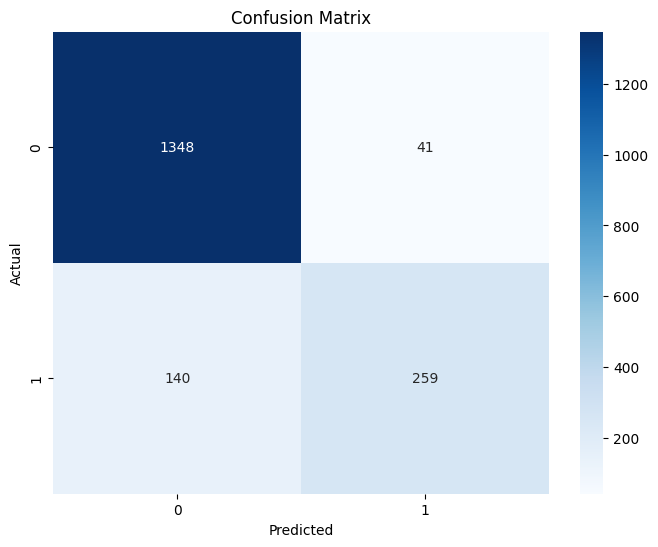

In [105]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [106]:
TN, FP, FN, TP = conf_matrix.ravel()
# Calculate false positives
print("False Positives:", FP)
# Calculate other related metrics
print("True Positives:", TP)
print("True Negatives:", TN)
print("False Negatives:", FN)

False Positives: 41
True Positives: 259
True Negatives: 1348
False Negatives: 140


#Using Naive Bayes classifier

In [36]:
# Initialize the Naive Bayes Classifier
nb_classifier = GaussianNB()

In [37]:
# Fit the model to the training data
nb_classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [142]:
# Predict the target variable for the test set
y_pred = nb_classifier.predict(X_test)

In [137]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes Accuracy:", accuracy)
accuracies.append(accuracy)

Naive Bayes Accuracy: 0.7829977628635347


In [109]:
precision = precision_score(y_test, y_pred)
print("Naive Bayes precision:", precision)

Naive Bayes precision: 0.5179153094462541


In [110]:
recall = recall_score(y_test, y_pred)
print("Naive Bayes recall:", recall)

Naive Bayes recall: 0.39849624060150374


In [143]:
f1 = f1_score(y_test, y_pred)
print("Naive Bayes f1:", f1)
f1_scores.append(f1)

Naive Bayes f1: 0.4504249291784702


In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1389
           1       0.52      0.40      0.45       399

    accuracy                           0.78      1788
   macro avg       0.68      0.65      0.66      1788
weighted avg       0.77      0.78      0.77      1788



In [43]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[1241  148]
 [ 240  159]]


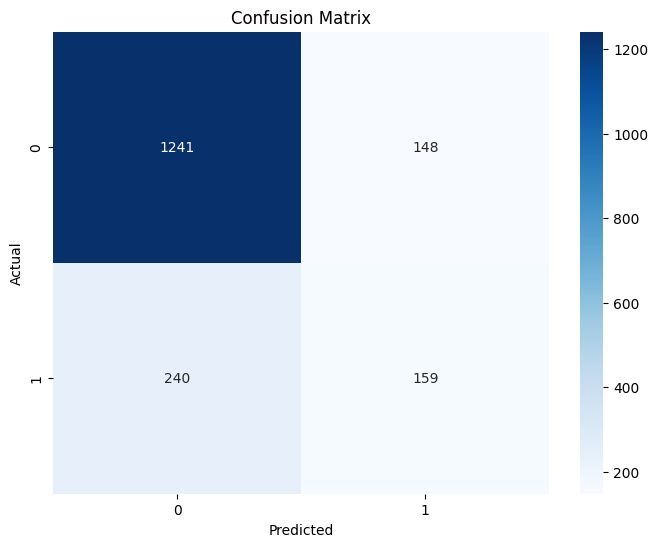

In [44]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [45]:
TN, FP, FN, TP = conf_matrix.ravel()
# Calculate false positives
print("False Positives:", FP)
# Calculate other related metrics
print("True Positives:", TP)
print("True Negatives:", TN)
print("False Negatives:", FN)

False Positives: 148
True Positives: 159
True Negatives: 1241
False Negatives: 240


# Using ANN

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam


ann_model = Sequential()
ann_model.add(Dense(10, input_dim = X_train.shape[1], activation='relu'))
ann_model.add(Dense(5, input_dim = X_train.shape[1], activation='relu'))
ann_model.add(Dense(1, activation='relu'))

ann_model.compile(
    loss='binary_crossentropy',
    optimizer = Adam(learning_rate = 0.001),
    metrics=['accuracy']
)

ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                170       
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 231 (924.00 Byte)
Trainable params: 231 (924.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
training_history = ann_model.fit(
    X_train,
    y_train,
    batch_size = 5,
    epochs = 10,
    validation_split = .2,
    verbose = 1
)

Epoch 1/10
668/668 [==============================] - 4s 4ms/step - loss: 0.6463 - accuracy: 0.8004 - val_loss: 0.4845 - val_accuracy: 0.8335
Epoch 2/10
668/668 [==============================] - 2s 3ms/step - loss: 0.4355 - accuracy: 0.8226 - val_loss: 0.3934 - val_accuracy: 0.8467
Epoch 3/10
668/668 [==============================] - 2s 4ms/step - loss: 0.3837 - accuracy: 0.8397 - val_loss: 0.3985 - val_accuracy: 0.8527
Epoch 4/10
668/668 [==============================] - 3s 4ms/step - loss: 0.3694 - accuracy: 0.8556 - val_loss: 0.3823 - val_accuracy: 0.8611
Epoch 5/10
668/668 [==============================] - 2s 3ms/step - loss: 0.3958 - accuracy: 0.8622 - val_loss: 0.4002 - val_accuracy: 0.8754
Epoch 6/10
668/668 [==============================] - 2s 3ms/step - loss: 0.3438 - accuracy: 0.8631 - val_loss: 0.3409 - val_accuracy: 0.8659
Epoch 7/10
668/668 [==============================] - 2s 3ms/step - loss: 0.3282 - accuracy: 0.8663 - val_loss: 0.3345 - val_accuracy: 0.8683
Epoch 

In [112]:
ann_pred = ann_model.predict(X_test)

56/56 [==============================] - 0s 3ms/step


In [113]:
for i in range(len(ann_pred)):
    if ann_pred[i] < 0.5:
        ann_pred[i] = 0
    else:
        ann_pred[i] = 1

ann_pred = ann_pred.astype(int)
ann_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [138]:
# Evaluate the model
accuracy = accuracy_score(y_test, ann_pred)
print("ANN Accuracy:", accuracy)
accuracies.append(accuracy)

ANN Accuracy: 0.8557046979865772


In [115]:
precision = precision_score(y_test, ann_pred)
print("ANN precision:", precision)

ANN precision: 0.7660377358490567


In [116]:
recall = recall_score(y_test, ann_pred)
print("ANN precision:", recall)

ANN precision: 0.5087719298245614


In [146]:
f1 = f1_score(y_test, ann_pred)
print("ANN f1:", f1)
f1_scores.append(f1)

ANN f1: 0.6114457831325302


In [53]:
print(classification_report(y_test, ann_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1389
           1       0.77      0.51      0.61       399

    accuracy                           0.86      1788
   macro avg       0.82      0.73      0.76      1788
weighted avg       0.85      0.86      0.84      1788



In [54]:
conf_matrix = confusion_matrix(y_test, ann_pred)
print(conf_matrix)

[[1327   62]
 [ 196  203]]


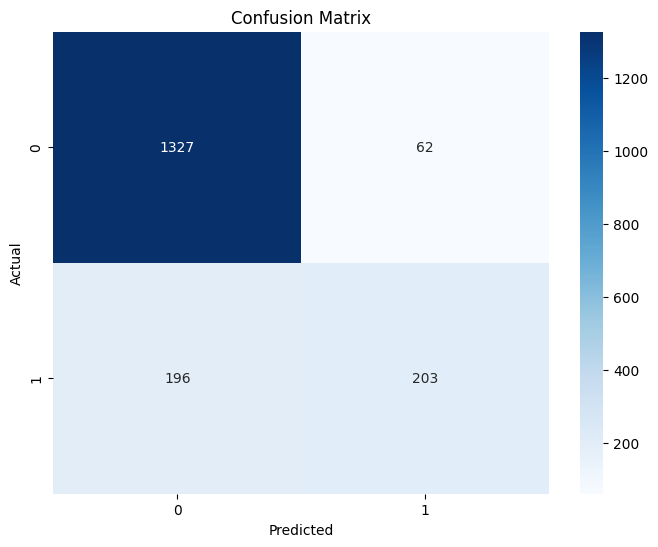

In [55]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [56]:
TN, FP, FN, TP = conf_matrix.ravel()
# Calculate false positives
print("False Positives:", FP)
# Calculate other related metrics
print("True Positives:", TP)
print("True Negatives:", TN)
print("False Negatives:", FN)

False Positives: 62
True Positives: 203
True Negatives: 1327
False Negatives: 196


# Using KNN

In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np


k_values = [3, 5, 10]

best_accuracy = 0
best_k = None

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)

    scores = cross_val_score(knn, X_train, y_train.values.ravel(), cv = 5)
    mean_accuracy = np.mean(scores)
    print(f'Cross-validated accuracy of model with k = {k}: {mean_accuracy}')

    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_k = k


print(f'Optimum k: {best_k}, Best Cross-validated accuracy: {best_accuracy}')

Cross-validated accuracy of model with k = 3: 0.89021841209667
Cross-validated accuracy of model with k = 5: 0.8731997874754089
Cross-validated accuracy of model with k = 10: 0.8461175490745129
Optimum k: 3, Best Cross-validated accuracy: 0.89021841209667


In [58]:
final_knn = KNeighborsClassifier(n_neighbors = best_k)
final_knn.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=3)

In [59]:
knn_pred = final_knn.predict(X_test)
knn_pred

array([0, 0, 0, ..., 0, 0, 0])

In [139]:
# Evaluate the model
accuracy = accuracy_score(y_test, knn_pred)
print("KNN Accuracy:", accuracy)
accuracies.append(accuracy)

KNN Accuracy: 0.8769574944071589


In [119]:
precision = precision_score(y_test, knn_pred)
print("KNN precision:", precision)

KNN precision: 0.8808510638297873


In [120]:
recall = recall_score(y_test, knn_pred)
print("KNN precision:", recall)

KNN precision: 0.518796992481203


In [147]:
f1 = f1_score(y_test, knn_pred)
print("KNN f1:", f1)
f1_scores.append(f1)

KNN f1: 0.6529968454258676


In [63]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1389
           1       0.88      0.52      0.65       399

    accuracy                           0.88      1788
   macro avg       0.88      0.75      0.79      1788
weighted avg       0.88      0.88      0.86      1788



In [64]:
conf_matrix = confusion_matrix(y_test, knn_pred)
print(conf_matrix)

[[1361   28]
 [ 192  207]]


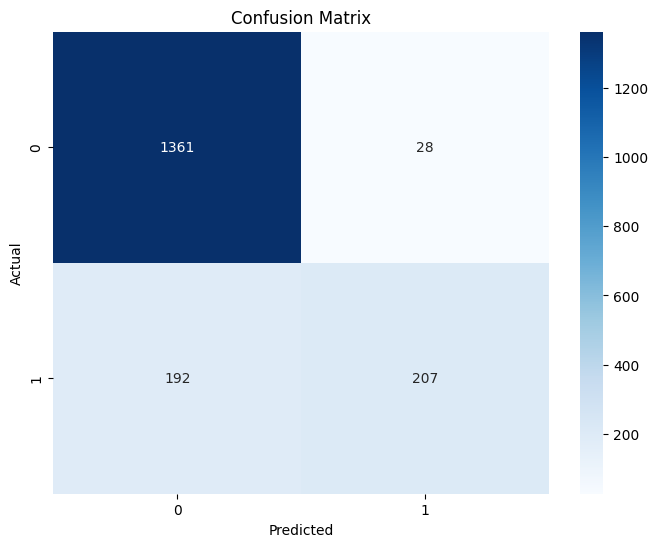

In [65]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [66]:
TN, FP, FN, TP = conf_matrix.ravel()
# Calculate false positives
print("False Positives:", FP)
# Calculate other related metrics
print("True Positives:", TP)
print("True Negatives:", TN)
print("False Negatives:", FN)

False Positives: 28
True Positives: 207
True Negatives: 1361
False Negatives: 192


# Using SVM

In [67]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [68]:
svm_pred = svc.predict(X_test)
svm_pred

array([0, 0, 0, ..., 0, 0, 0])

In [148]:
# Evaluate the model
accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", accuracy)
accuracies.append(accuracy)

SVM Accuracy: 0.8400447427293065


In [123]:
precision = precision_score(y_test, svm_pred)
print("SVM precision:", precision)

SVM precision: 0.8192090395480226


In [124]:
recall = recall_score(y_test, svm_pred)
print("SVM precision:", recall)

SVM precision: 0.3634085213032581


In [149]:
f1 = f1_score(y_test, svm_pred)
print("SVM f1:", f1)
f1_scores.append(f1)

SVM f1: 0.5034722222222222


In [72]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90      1389
           1       0.82      0.36      0.50       399

    accuracy                           0.84      1788
   macro avg       0.83      0.67      0.70      1788
weighted avg       0.84      0.84      0.82      1788



In [73]:
conf_matrix = confusion_matrix(y_test, svm_pred)
print(conf_matrix)

[[1357   32]
 [ 254  145]]


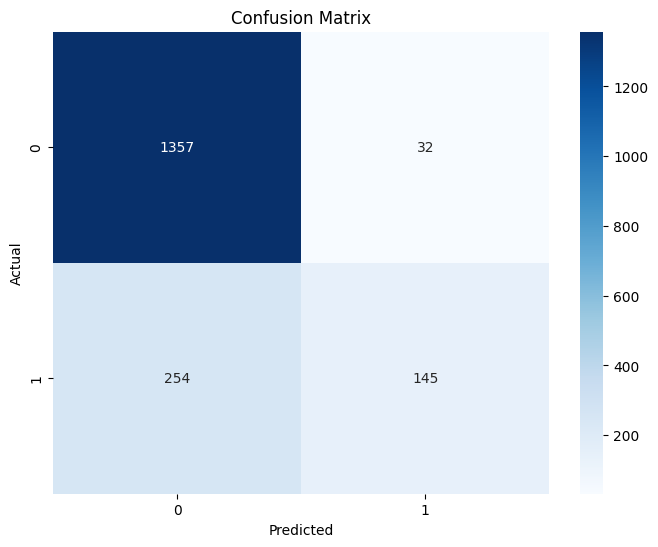

In [74]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [75]:
TN, FP, FN, TP = conf_matrix.ravel()
# Calculate false positives
print("False Positives:", FP)
# Calculate other related metrics
print("True Positives:", TP)
print("True Negatives:", TN)
print("False Negatives:", FN)

False Positives: 32
True Positives: 145
True Negatives: 1357
False Negatives: 254


# Using CART

In [76]:
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

cart_model = DecisionTreeClassifier()
cart_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [77]:
cart_pred = cart_model.predict(X_test)

In [150]:
# Evaluate the model
accuracy = accuracy_score(y_test, cart_pred)
print("CART Accuracy:", accuracy)
accuracies.append(accuracy)

CART Accuracy: 0.860178970917226


In [81]:
precision = precision_score(y_test, cart_pred)
print("CART precision:", precision)

CART precision: 0.7052341597796143


In [82]:
recall = recall_score(y_test, cart_pred)
print("CART precision:", recall)

CART precision: 0.6416040100250626


In [151]:
f1 = f1_score(y_test, cart_pred)
print("CART f1:", f1)
f1_scores.append(f1)

CART f1: 0.6719160104986877


In [83]:
print(classification_report(y_test, cart_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1389
           1       0.71      0.64      0.67       399

    accuracy                           0.86      1788
   macro avg       0.80      0.78      0.79      1788
weighted avg       0.86      0.86      0.86      1788



In [84]:
conf_matrix = confusion_matrix(y_test, cart_pred)
print(conf_matrix)

[[1282  107]
 [ 143  256]]


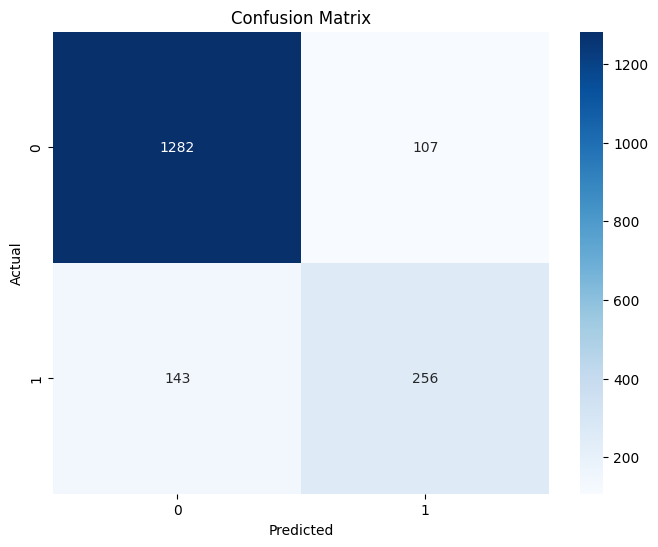

In [85]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [86]:
TN, FP, FN, TP = conf_matrix.ravel()
# Calculate false positives
print("False Positives:", FP)
# Calculate other related metrics
print("True Positives:", TP)
print("True Negatives:", TN)
print("False Negatives:", FN)

False Positives: 107
True Positives: 256
True Negatives: 1282
False Negatives: 143


# Model Comparison

In [152]:
for i in range(len(accuracies)):
    accuracies[i] = accuracies[i] * 100
print(accuracies)

[89.87695749440716, 78.29977628635348, 85.57046979865773, 87.69574944071589, 84.00447427293065, 86.01789709172259]


In [153]:
print(f1_scores)

[0.7410586552217453, 0.4504249291784702, 0.6114457831325302, 0.6529968454258676, 0.5034722222222222, 0.6719160104986877]


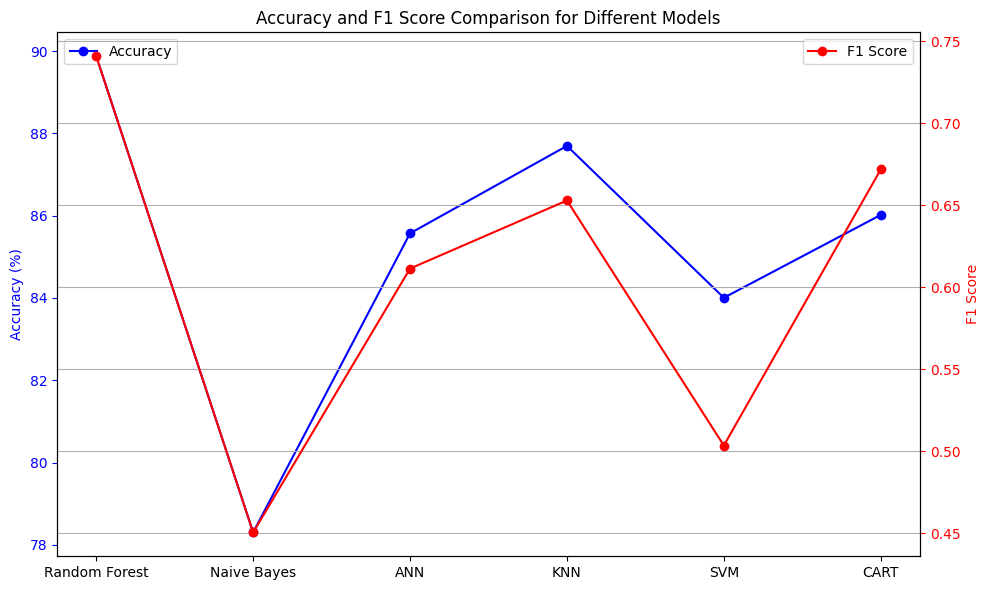

In [155]:
model_names = ['Random Forest', 'Naive Bayes', 'ANN', 'KNN', 'SVM', 'CART']

# plt.figure(figsize=(10, 6))
# plt.plot(model_names, accuracies, marker='o', label='Accuracy')
# plt.plot(model_names, f1_scores, marker='o', label='F1 Score')
# plt.title('Accuracy and F1 Score Comparison for Different Models')
# plt.xlabel('Models')
# plt.ylabel('Score')
# plt.xticks(rotation=45)
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()


# Create figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot accuracy values
ax1.plot(model_names, accuracies, marker='o', label='Accuracy', color='b')

# Set y-axis label for accuracy
ax1.set_ylabel('Accuracy (%)', color='b')
ax1.tick_params('y', colors='b')

# Create a second y-axis for F1 score
ax2 = ax1.twinx()

# Plot F1 score values
ax2.plot(model_names, f1_scores, marker='o', label='F1 Score', color='r')

# Set y-axis label for F1 score
ax2.set_ylabel('F1 Score', color='r')
ax2.tick_params('y', colors='r')

# Add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Set title and labels
plt.title('Accuracy and F1 Score Comparison for Different Models')
plt.xlabel('Models')

# Rotate x-axis labels
plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()